In [67]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Project: Glass Classification
Author: Adeola Odunewu
Company: FlipRobo Tech


In [25]:
# Data URL
url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Glass%20Identification/Glass%20Identification.csv'
# Read data into DataFrame
df = pd.read_csv(url,  header=None)
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Cheking for missing data
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

Upon reviewing the data, partial feature engineering is deemed necessary to ensure reproducibility.

In [26]:
# Define the column names based on the provided information 
column_names = [
    "Id number",
    "RI (refractive index)",
    "Na (Sodium)",
    "Mg (Magnesium)",
    "Al (Aluminum)",
    "Si (Silicon)",
    "K (Potassium)",
    "Ca (Calcium)",
    "Ba (Barium)",
    "Fe (Iron)",
    "Type of glass"
] 
df.columns = column_names
df.head()

,Id number,RI (refractive index),Na (Sodium),Mg (Magnesium),Al (Aluminum),Si (Silicon),K (Potassium),Ca (Calcium),Ba (Barium),Fe (Iron),Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
# Display summary statistics of the DataFrame
# This function computes basic statistics for numerical columns in the DataFrame
df.describe()

,Id number,RI (refractive index),Na (Sodium),Mg (Magnesium),Al (Aluminum),Si (Silicon),K (Potassium),Ca (Calcium),Ba (Barium),Fe (Iron),Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [28]:
df.head()

,Id number,RI (refractive index),Na (Sodium),Mg (Magnesium),Al (Aluminum),Si (Silicon),K (Potassium),Ca (Calcium),Ba (Barium),Fe (Iron),Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [29]:
categorical_data = []
# Iterate over the columns and check if their data type is 'object'
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_data.append(i)

print("Categorical columns:", categorical_data)

numeric_data = []
# Iterate over the columns and check if their data type is either 'int64' or 'float64'
for j in df.dtypes.index:
    if df.dtypes[j] in ['int64', 'float64']:
        numeric_data.append(j)

print("Numeric columns:", numeric_data)


Categorical columns: []
Numeric columns: ['Id number', 'RI (refractive index)', 'Na (Sodium)', 'Mg (Magnesium)', 'Al (Aluminum)', 'Si (Silicon)', 'K (Potassium)', 'Ca (Calcium)', 'Ba (Barium)', 'Fe (Iron)', 'Type of glass']


No categorical data

In [30]:
#getting the data type
df.dtypes.index

Index(['Id number', 'RI (refractive index)', 'Na (Sodium)', 'Mg (Magnesium)',
       'Al (Aluminum)', 'Si (Silicon)', 'K (Potassium)', 'Ca (Calcium)',
       'Ba (Barium)', 'Fe (Iron)', 'Type of glass'],
      dtype='object')

In [31]:
# converts categorical columns to factors using cat.codes 
for col in categorical_data:
    df[col] = df[col].astype('category').cat.codes

Using .astype('category'), and then converts the categories to their corresponding integer codes using
.cat.codes. This approach effectively converts categorical columns to factors (numerical representation
of categorical variables) suitable for machine learning algorithms.

In [32]:
df.dtypes.index

Index(['Id number', 'RI (refractive index)', 'Na (Sodium)', 'Mg (Magnesium)',
       'Al (Aluminum)', 'Si (Silicon)', 'K (Potassium)', 'Ca (Calcium)',
       'Ba (Barium)', 'Fe (Iron)', 'Type of glass'],
      dtype='object')

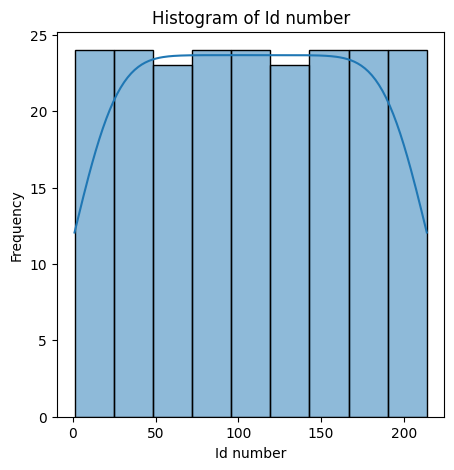

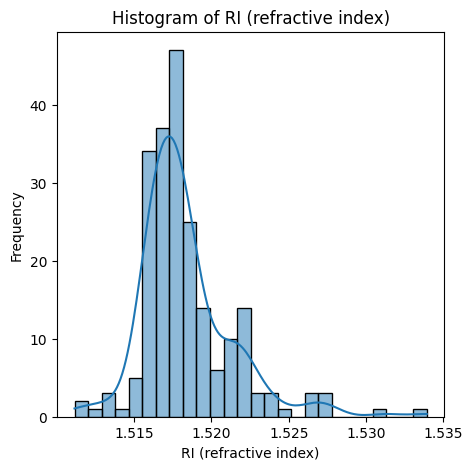

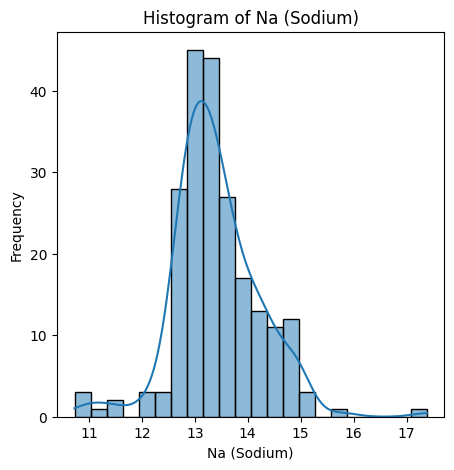

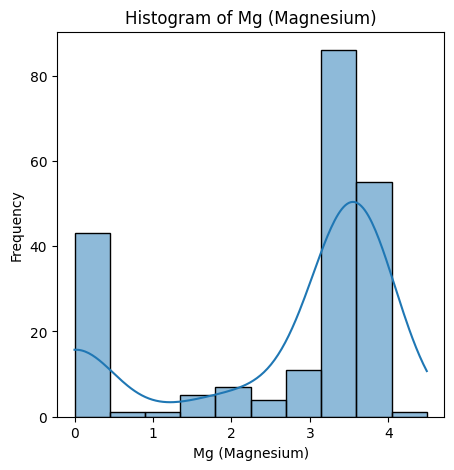

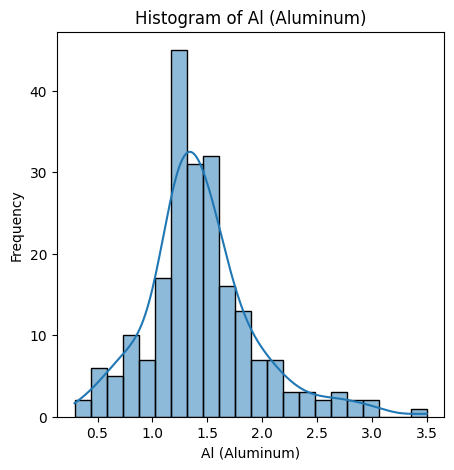

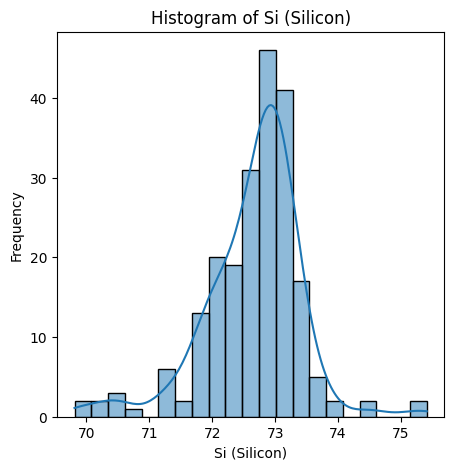

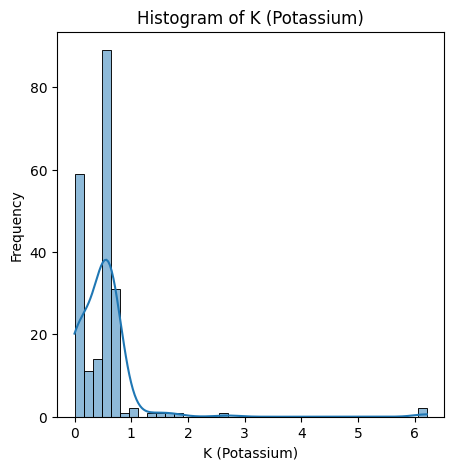

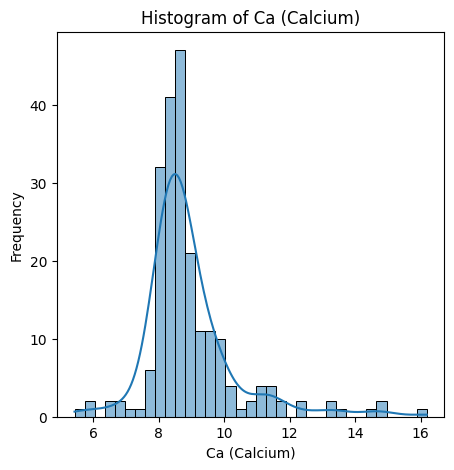

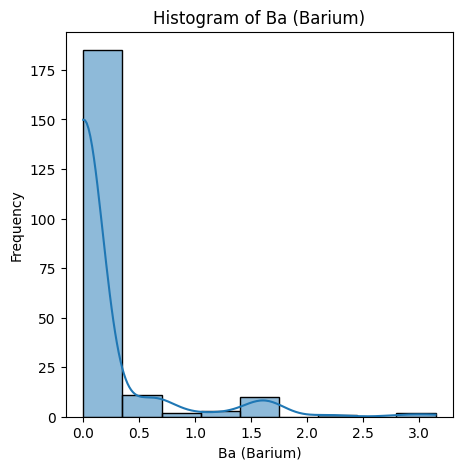

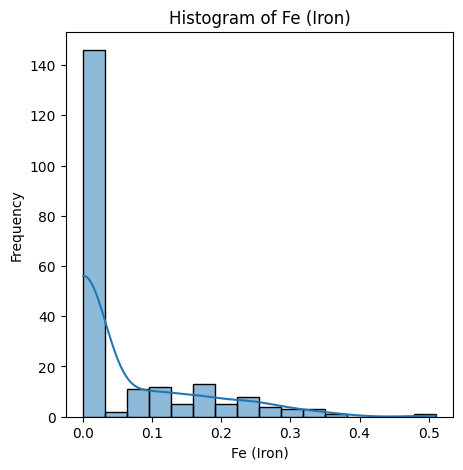

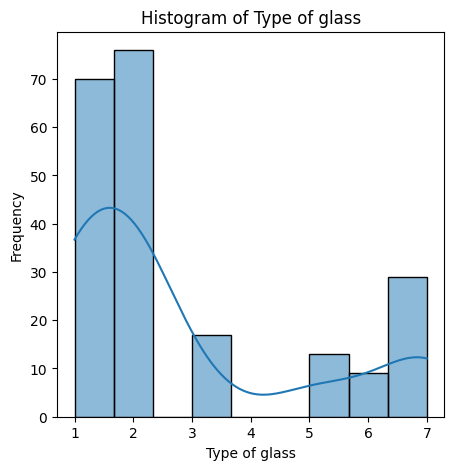

In [17]:
# Iterate over each categorical column and create a boxplot
# Get the list of columns in the DataFrame
columns = df.columns
# Check the data type of the column
for column in columns:
    dtype = df[column].dtype
    plt.figure(figsize = (5,5))
    sns.histplot(df[column], kde = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [33]:
# Framing numerical data
num_df = df[['Id number', 'RI (refractive index)', 'Na (Sodium)', 'Mg (Magnesium)', 'Al (Aluminum)', 'Si (Silicon)', 'K (Potassium)', 'Ca (Calcium)', 'Ba (Barium)', 'Fe (Iron)']]

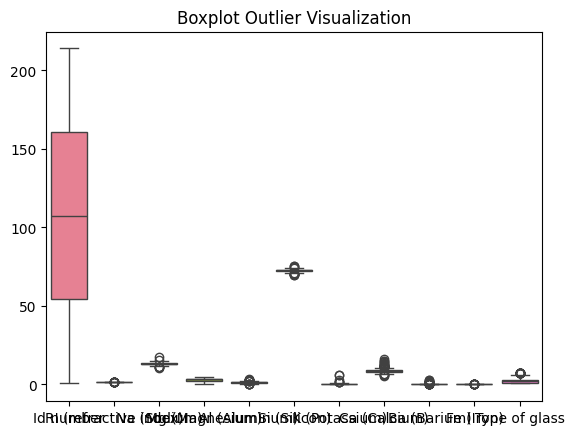

In [16]:
# Create a boxplot for all numerical columns
sns.boxplot(data=df)

# Add title to the plot
plt.title('Boxplot Outlier Visualization')

# Show the plot
plt.show()

Using a boxplot to detect outliers, I noticed that the potassium (K) levels show a slight deviation from the norm, which raises some concern. However, for the sake of continuity, I've decided to proceed without addressing it at this time.

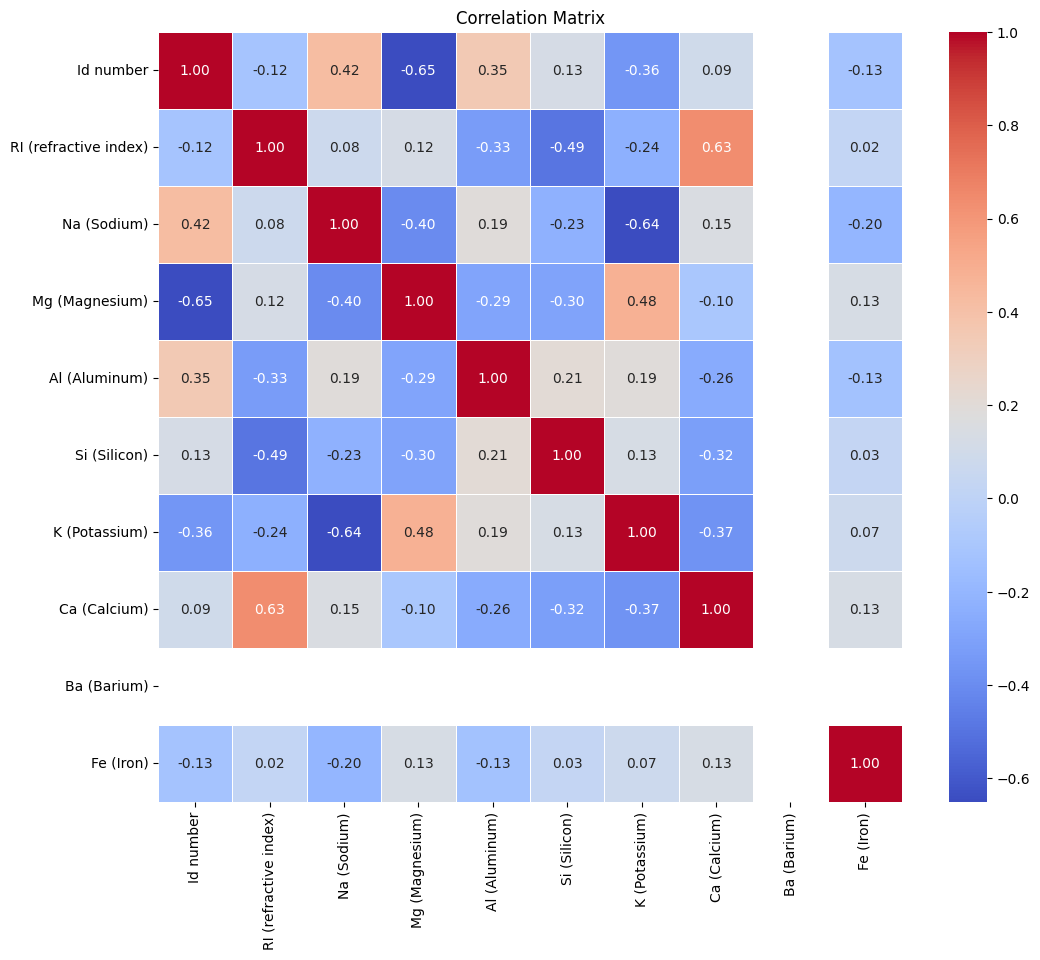

In [35]:
# Correlation Analysis for X is the DataFrame
correlation_matrix = df_imputed.corr()
#print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [37]:
# Perform feature engineering on the 'Type of glass' column
df['Type of glass'] = df['Type of glass'].apply(lambda x: 'window' if x in [1, 2, 3, 4] else 'non-window')

In [64]:
df_imputed.skew()

RI (refractive index)    0.663026
Na (Sodium)              0.557980
Mg (Magnesium)          -1.152559
Al (Aluminum)            0.125714
Si (Silicon)            -0.637447
K (Potassium)           -0.485100
Ca (Calcium)             0.515202
Ba (Barium)              0.000000
Fe (Iron)                1.646353
dtype: float64

The insightful aspect of this data lies in understanding how different elements exhibit varying degrees and directions of skewness in their refractive index distributions. For instance, while elements like Iron (Fe) and Sodium (Na) show pronounced positive skewness, indicating a concentration of higher refractive index values, Magnesium (Mg) displays a notable negative skewness, suggesting a prevalence of lower refractive index values. This insight sheds light on the diverse optical properties of these elements, which could have implications in various scientific and industrial applications, such as material characterization and optical engineering.

In [66]:
df_imputed  = df_imputed.drop('Id number', axis = 1)


,RI (refractive index),Na (Sodium),Mg (Magnesium),Al (Aluminum),Si (Silicon),K (Potassium),Ca (Calcium),Ba (Barium),Fe (Iron)
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,1.36,72.61,0.08,9.18,0.0,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0


In [48]:
# Set the random seed
np.random.seed(42)

# Assuming df_imputed and df are defined somewhere earlier

# Split the dataset into features (X) and the target variable (y)
X = df_imputed  # Features (excluding 'Type of glass' column)
y = df['Type of glass']  # Target variable

# Standardize features 
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

y_encode = pd.get_dummies(y)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
y.value_counts()

Type of glass
window        163
non-window     51
Name: count, dtype: int64

In [50]:
# Initialize SMOTE ( to address the class imbalance in the datasets.)
sm = SMOTE()
# The implementation of the fit_resample 
X,y = sm.fit_resample(X,y)

In [51]:
# Create a DataFrame to see the distribution of classes in the target vector y
data = pd.concat([X, y], axis=1)
class_distribution = data[y.name].value_counts()

print(class_distribution)

Type of glass
window        163
non-window    163
Name: count, dtype: int64


In [62]:
# Set the random seed
np.random.seed(42)

# Initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
logistic_regression = LogisticRegression(solver='sag')

classifiers = [random_forest, gradient_boosting, logistic_regression]

for clf in classifiers:
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("="*50)

Classifier: RandomForestClassifier
Accuracy: 0.9535
Classification Report:
               precision    recall  f1-score   support

  non-window       0.93      0.93      0.93        15
      window       0.96      0.96      0.96        28

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43

Classifier: GradientBoostingClassifier
Accuracy: 0.9070
Classification Report:
               precision    recall  f1-score   support

  non-window       0.82      0.93      0.87        15
      window       0.96      0.89      0.93        28

    accuracy                           0.91        43
   macro avg       0.89      0.91      0.90        43
weighted avg       0.91      0.91      0.91        43

Classifier: LogisticRegression
Accuracy: 0.9302
Classification Report:
               precision    recall  f1-score   support

  non-window       0.93      0.87      0.90        15
      win

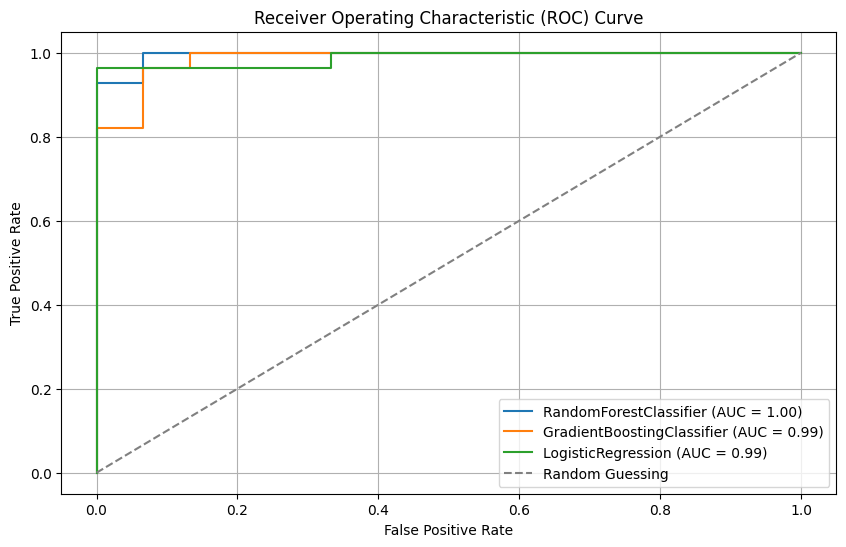

In [63]:

from sklearn.preprocessing import LabelBinarizer

# Convert categorical labels to binary labels
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)

# Now y_test_binary contains binary labels suitable for ROC curve computation

# Plot ROC curve for each classifier
plt.figure(figsize=(10, 6))
for clf in classifiers:
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_score = clf.predict_proba(X_test)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_binary, y_score[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{clf.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


Among the classifiers evaluated, RandomForestClassifier demonstrated the highest accuracy at 95.35%. Its precision, recall, and F1-score for both
classes were commendable. GradientBoostingClassifier followed closely with an accuracy of 90.70%, displaying slightly lower metrics. 
LogisticRegression showed an accuracy of 93.02% with comparable performance to RandomForestClassifier. Overall, RandomForestClassifier 
appears to be the most effective choice, offering robust performance across all evaluated metrics. However, considerations such as computational
complexity and interpretability should also be taken into account.